The following cell imports the necessary libraries for data manipulation, visualization, and building the deep learning model.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix

This cell loads the emotion classification data from a CSV file into a pandas DataFrame.

In [26]:
data = pd.read_csv('Emotion_classify_Data.csv')

The `head()` method is used to display the first few rows of the DataFrame, providing a preview of the data structure and content.

In [27]:
data.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


The `tail()` method is used to display the last few rows of the DataFrame, which is useful for inspecting the end of the dataset.

In [28]:
data.tail()

,Comment,Emotion
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear
5936,i just wanted to apologize to you because i fe...,anger


This cell prints information about the DataFrame, including the column names, non-null counts, and data types. This helps in understanding the data and identifying any missing values.

In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB
None


This cell counts the occurrences of each unique value in the 'Emotion' column, providing insights into the distribution of emotions in the dataset.

In [30]:
data['Emotion'].value_counts()

,count
Emotion,
anger,2000
joy,2000
fear,1937


Here, the 'Comment' column is assigned to `X` (features) and the 'Emotion' column to `y` (target variable) for further processing.

In [31]:
X = data['Comment']
y = data['Emotion']

A LabelEncoder is used to convert the categorical 'Emotion' labels into numerical representations, which is required for training the deep learning model.

In [32]:
le = LabelEncoder()
y = le.fit_transform(y)

The data is split into training and testing sets using `train_test_split` to evaluate the model's performance on unseen data.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A Tokenizer is initialized to convert the text data into sequences of integers. The `fit_on_texts` method builds the vocabulary, and `pad_sequences` ensures all sequences have the same length by padding or truncating them.

In [34]:
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_text_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

This cell defines the architecture of the deep learning model using Keras Sequential API. It includes an Embedding layer, an LSTM layer, and a Dense output layer with softmax activation for multi-class classification. The model is then compiled with the Adam optimizer and sparse categorical crossentropy loss. The `model.build()` method is called to build the model with the specified input shape before displaying the model summary.

In [35]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=16),
    keras.layers.LSTM(64, dropout=0.1, recurrent_dropout=0.1),
    keras.layers.Dense(3, activation='softmax')
])

model.build(input_shape=(None, max_len)) # Build the model with input shape
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,931 (706.76 KB)

 Trainable params: 180,931 (706.76 KB)

 Non-trainable params: 0 (0.00 B)

The model is trained on the training data for a specified number of epochs. The `validation_data` is used to monitor the model's performance on the test set during training.

In [36]:
history = model.fit(X_train_seq, y_train, epochs=10, validation_data=(X_text_seq, y_test), batch_size=32)

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.3752 - loss: 1.0939 - val_accuracy: 0.5758 - val_loss: 1.0113
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.6755 - loss: 0.8471 - val_accuracy: 0.8485 - val_loss: 0.4287
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9420 - loss: 0.2190 - val_accuracy: 0.9167 - val_loss: 0.2474
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.9774 - loss: 0.0953 - val_accuracy: 0.9175 - val_loss: 0.2332
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.9838 - loss: 0.0607 - val_accuracy: 0.9192 - val_loss: 0.2430
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9896 - loss: 0.0409 - val_accuracy: 0.9116 - val_loss: 0.2379
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - accuracy: 0.9950 - loss: 0.0244 - val_accuracy: 0.9352 - val_loss: 0.1896
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.9948 - loss: 0

This cell plots the training and validation accuracy over epochs to visualize the model's learning progress and identify potential overfitting.

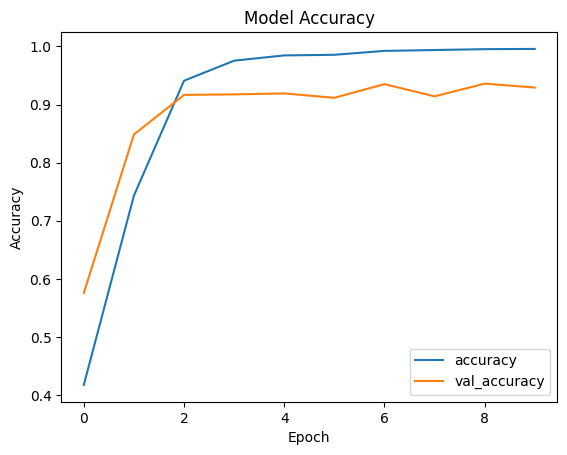

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The trained model is used to predict the emotion labels for the test data. The `argmax` function is used to get the predicted class with the highest probability. A classification report is then printed to evaluate the model's performance in terms of precision, recall, and f1-score for each class.

In [38]:
y_pred_prob = model.predict(X_text_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       392
           1       0.95      0.93      0.94       416
           2       0.96      0.91      0.93       380

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



A confusion matrix is generated and displayed as a heatmap to visualize the number of correct and incorrect predictions for each emotion class.

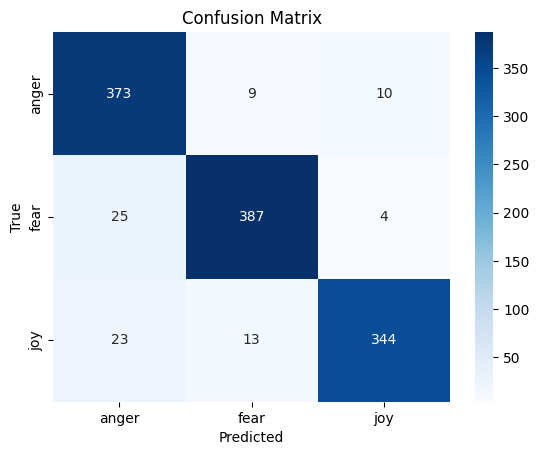

In [39]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This cell iterates through the first 20 examples in the test set and displays the actual emotion, predicted emotion, and the corresponding text comment to show examples of the model's predictions.

In [40]:
# Display actual vs predicted emotions
for i in range(20):  # Display the first 10 examples
    actual_emotion = le.classes_[y_test[i]]
    predicted_emotion = le.classes_[y_pred[i]]
    text = X_test.iloc[i]

    print(f"Example {i+1}:\n"
          f"Actual Emotion: {actual_emotion}\n"
          f"Predicted Emotion: {predicted_emotion}\n"
          f"Text: {text}\n"
          f"{'='*50}\n")

Example 1:
Actual Emotion: anger
Predicted Emotion: joy
Text: i do give up at times when i feel there s no point in a friendship when one cant be bothered

Example 2:
Actual Emotion: joy
Predicted Emotion: joy
Text: im a firm believer that nothing makes a woman feel much more terrific than a great trip to the salon to lift her spirits a bit

Example 3:
Actual Emotion: fear
Predicted Emotion: fear
Text: i was feeling very vulnerable and down no one really close to me has ever died before i either hadnt known them very well or was too young to remember

Example 4:
Actual Emotion: anger
Predicted Emotion: anger
Text: i closed her eyes in anger and feeling disgusted by this touch

Example 5:
Actual Emotion: anger
Predicted Emotion: anger
Text: i feel like being distracted

Example 6:
Actual Emotion: fear
Predicted Emotion: fear
Text: i just feel shy because i was just a sharia stream student who is now still struggling with european union policy and decision making thesis while those uncle